# PID Endeavour in Python (Controls & Simulations Sub-Team)


## Goals:
    -Model physics of reaction wheel system
    -Create PID system 
    -Plot results
    
## Future Goals:
    -Find optimum values


### Relevant Library Requirements

In [1]:
import matplotlib.pyplot as plt 
import math

### Global Variables:

In [2]:
###########################
# Moment of Inertia (MOI) #
###########################
rocket_MOI = 0.01
reaction_Wheel_MOI = 0.01

###################################################
# Angular Velocity (AV) in Revolutions per Minuit #
###################################################

rocket_AV = [180, 180]
reaction_Wheel_AV = [0, 0]

##########################
# PID coefficient Values #
##########################

k_P = 0.5 #Proportional Gain
k_I = 0.2 #Integral Gain
k_D = 0.0 #Derivative Gain

integral_error = 0 #Current Integral Value

#########################
# Additional PID Values #
#########################

time_Inc = 0.001
times = [-1*time_Inc, 0]
nota = 1 #Number of times appended


### Relevent Functions:
#### Physics

$$
  0=V_{rocket}* I_{rocket} - V_{wheel} * I_{wheel}\\
  =>V_{rocket}= \frac{V_{wheel} * I_{wheel}}{I_{rocket}}\\
$$


In [3]:
sm = 0
def perfect_Angular_Velocity_Transfer():
    global sm
    sm += ( (rocket_AV[nota-1]-rocket_AV[nota]) * reaction_Wheel_MOI ) / rocket_MOI 
    reaction_Wheel_AV.append(sm)
    
def rocket_Angular_Velocity_Error():
    return rocket_AV[nota]

def update_Rocket_Speed_Perfect(new_Rocket_Speed):
    rocket_AV.append(new_Rocket_Speed)
    
def update_Rocket_Speed_Limited(new_Rocket_Speed):
    if ( (rocket_AV[nota]-new_Rocket_Speed) * (rocket_AV[nota]-new_Rocket_Speed) > 2500):
        rocket_AV.append(rocket_AV[nota]-50.0)
    elif ( (rocket_AV[nota]-new_Rocket_Speed) * (rocket_AV[nota]-new_Rocket_Speed) < -2500):
        rocket_AV.append(rocket_AV[nota]+50.0)
    else:
        rocket_AV.append(new_Rocket_Speed)
    

#### PID

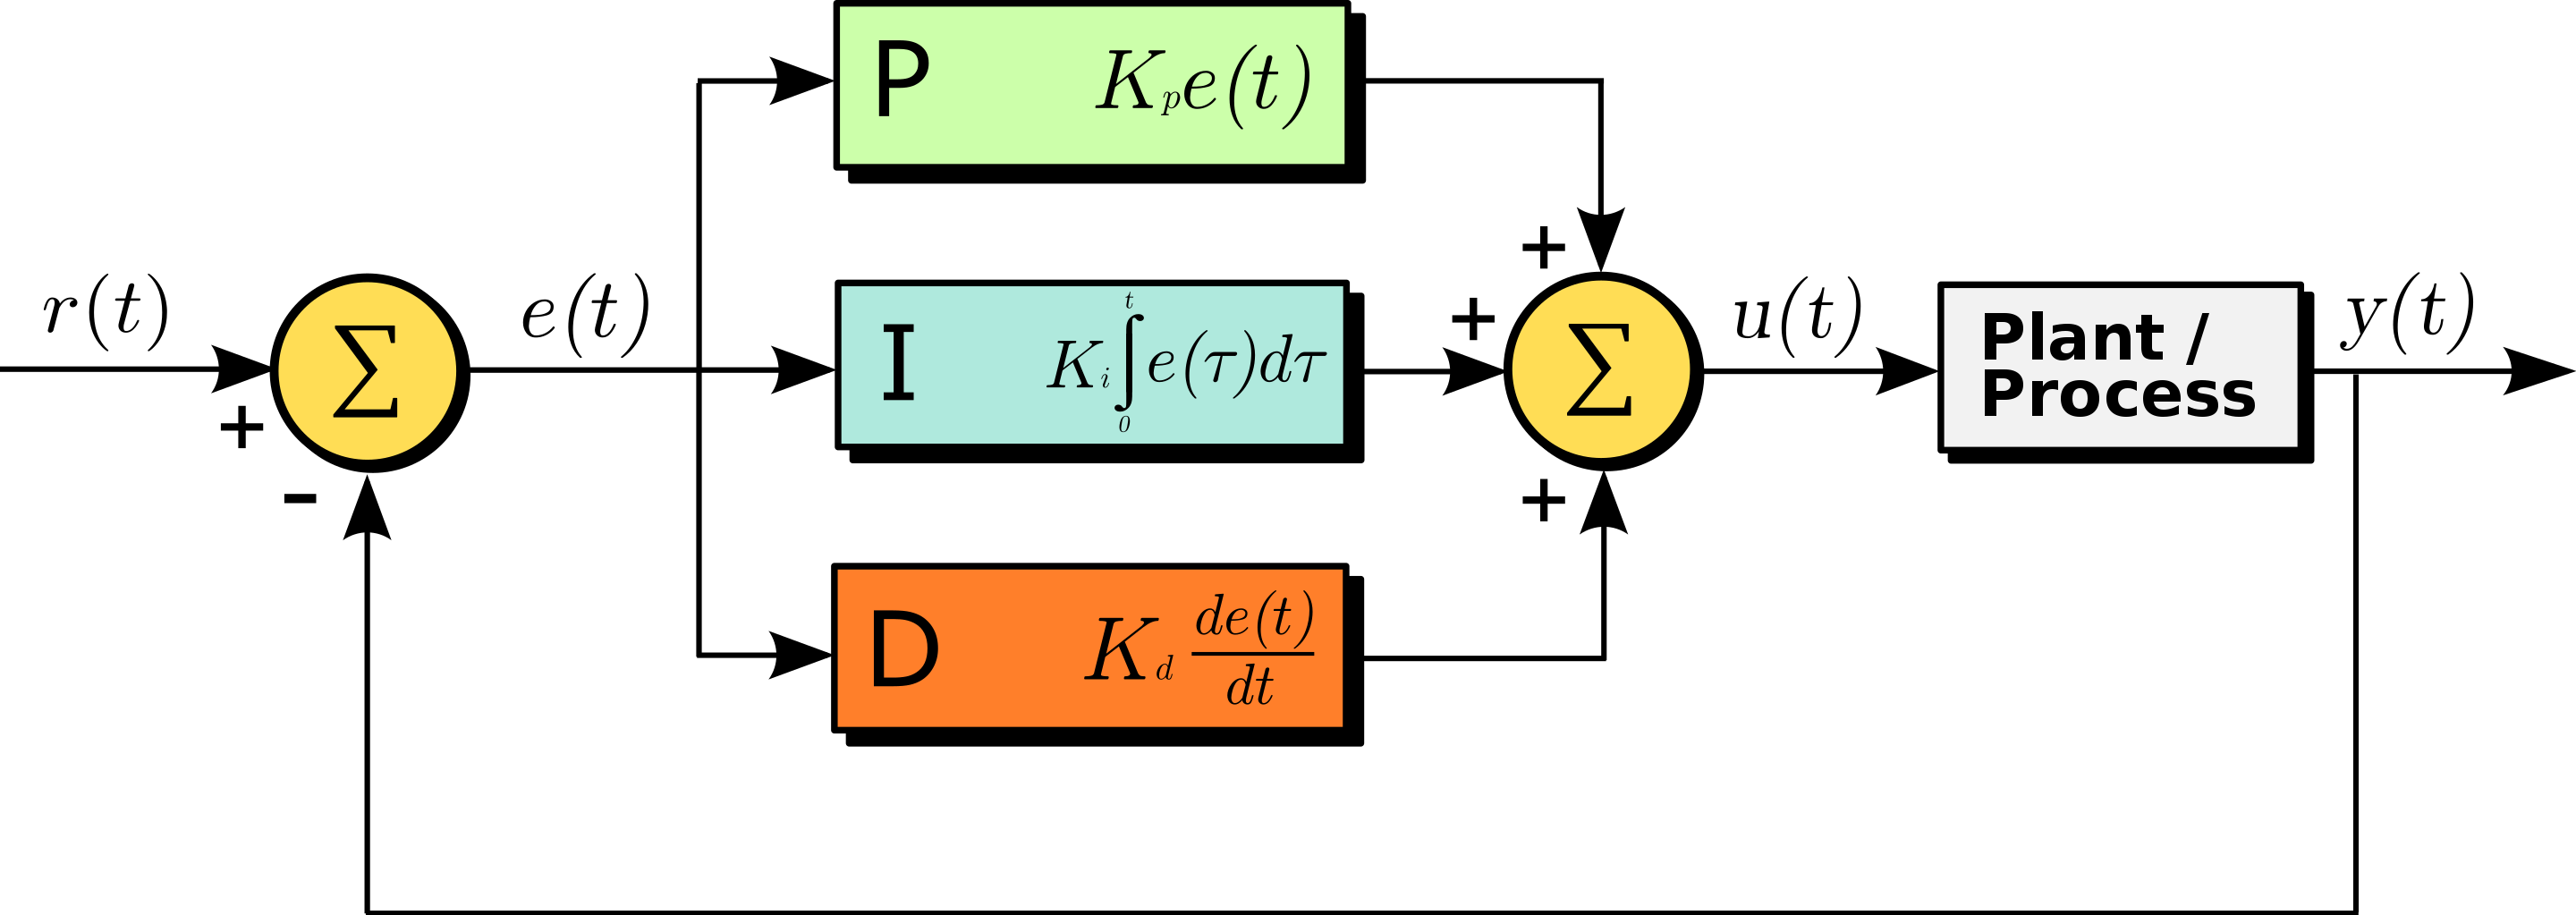

In [4]:
def calculate_Error():
    
    global integral_error
    
    e = rocket_Angular_Velocity_Error() # Calculating Proportional Error
    
    integral_error = integral_error + ( ( times[nota] - times[nota-1] ) * error ) # Calculating Integral Error
    
    derivative = ( error - rocket_AV[nota-1] ) / ( times[nota] - times[nota-1] ) # Calculating Derivative Error

    u = ( error * k_P ) + ( integral_error * k_I ) + ( derivative * k_D )
    
    return u
    

#### Graph/Plot

In [5]:
def plot():
    plt.plot(times[1:], rocket_AV[1:], label = "Rocket")   
    plt.plot(times[:-1], reaction_Wheel_AV[1:], label = "Wheel")   
    # naming the x axis 
    plt.xlabel('Time (s)') 
    # naming the y axis 
    plt.ylabel('Angular Velocity (rev/s)') 

    # giving a title to my graph 
    plt.title('PIDxReaction Wheel Graph') 

    # function to show the plot 
    plt.legend(loc='best')
    plt.show()
    plt.show() 

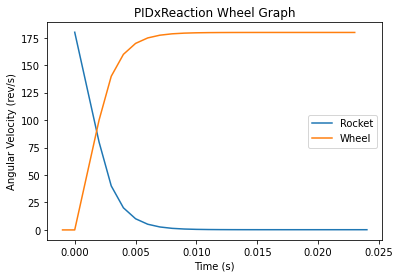

In [6]:
while (nota < 25):        
    update_Rocket_Speed_Limited(calculate_Error())
    perfect_Angular_Velocity_Transfer()
    times.append(times[nota]+time_Inc)# Increase Time
    nota = nota + 1
plot()